## HW Assignment 1

In this assignment, we will learn how to use Apache Spark RDDs and explore MapReduce and distributed processing. For each question, add your code below the question and run the code. 

Note: Your code can be in more than one cell if you choose.

Let's start by running the code below to start up a local Spark instance.

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-eu.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [ ]:
!pip install -q findspark
!pip install pyspark

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
from pyspark import SparkContext

In [ ]:
sc = SparkContext.getOrCreate()

In [ ]:
sc

SparkContext 

 Spark UI 

 
 Version 
 v3.3.0 
 Master 
 local[8] 
 AppName 
 Databricks Shell

1. Load the Alice in Wonderland text file into an RDD

In [ ]:
## reading a text file in a RDD

alice = spark.sparkContext.textFile("/FileStore/tables/alice-1.txt")

In [ ]:
alice.take(5)

Out[10]: ['The Project Gutenberg EBook of Aliceâ€™s Adventures in Wonderland, by Lewis Carroll',
 '',
 'This eBook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever.  You may copy it, give it away or',
 're-use it under the terms of the Project Gutenberg License included']

2. Transform all characters lowercase and remove all non-character symbols using the map function and store this in a new RDD.

In [ ]:
import re
aliceRDD = alice.map(lambda x: x.lower()).map(lambda x: re.sub(r'[^a-z]', ' ', x)).map(lambda x: re.sub("\s\s+" , " ", x))

In [ ]:
aliceRDD.take(5)

Out[12]: ['the project gutenberg ebook of alice s adventures in wonderland by lewis carroll',
 '',
 'this ebook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever you may copy it give it away or',
 're use it under the terms of the project gutenberg license included']

3. Write code to calculate the distribution of word length for the book Alice in Wonderland. Print the distribution in this notebook.

In [ ]:
def word_length(lines):
    words = lines.split(" ")
    lengths = [len(word) for word in words]
    return lengths

alicecountRDD = aliceRDD.flatMap(word_length).map(lambda x: (x,1)).reduceByKey(lambda x, y: x + y)

In [ ]:
aliceDictWordLength = dict(alicecountRDD.collect())

for length, count in aliceDictWordLength.items():
    print("Length {}: {} words".format(length, count))

Length 2: 5020 words
Length 10: 358 words
Length 0: 2878 words
Length 4: 6174 words
Length 6: 2209 words
Length 8: 836 words
Length 12: 64 words
Length 14: 13 words
Length 16: 1 words
Length 3: 7685 words
Length 7: 1885 words
Length 9: 720 words
Length 5: 3600 words
Length 1: 1844 words
Length 11: 149 words
Length 13: 18 words
Length 15: 2 words


4. N-grams are contiguous sequences of n words. Write a function to take a string containing multiple words and n as input and return a list of n-grams (the length of the n-grams is a parameter inputted into the function). 


Note: it's fine to only create ngrams out of each row of the text. For the purpose of this exercise, there is no need to combine rows of text.

In [ ]:
def generate_N_grams(text,ngram=2):
    words=[word for word in text.split(" ")]
    temp=zip(*[words[i:] for i in range(0,ngram)])
    return [' '.join(ngram) for ngram in temp]

5. Transform the RDD containing the book Alice in Wonderland to an RDD containing all 2-grams from each row in the book.

In [ ]:
aliceN_grams = aliceRDD.map(lambda x: generate_N_grams(x, 2))

In [ ]:
aliceN_grams.take(5)

Out[17]: [['the project',
  'project gutenberg',
  'gutenberg ebook',
  'ebook of',
  'of alice',
  'alice s',
  's adventures',
  'adventures in',
  'in wonderland',
  'wonderland by',
  'by lewis',
  'lewis carroll'],
 [],
 ['this ebook',
  'ebook is',
  'is for',
  'for the',
  'the use',
  'use of',
  'of anyone',
  'anyone anywhere',
  'anywhere at',
  'at no',
  'no cost',
  'cost and',
  'and with'],
 ['almost no',
  'no restrictions',
  'restrictions whatsoever',
  'whatsoever you',
  'you may',
  'may copy',
  'copy it',
  'it give',
  'give it',
  'it away',
  'away or'],
 ['re use',
  'use it',
  'it under',
  'under the',
  'the terms',
  'terms of',
  'of the',
  'the project',
  'project gutenberg',
  'gutenberg license',
  'license included']]

5. Transform the RDD containing the book Alice in Wonderland to an RDD containing all 2-grams from each row in the book.

In [ ]:
aliceRDDX = aliceN_grams.flatMap(lambda x: x)

In [ ]:
aliceRDDX.take(200)

Out[20]: ['the project',
 'project gutenberg',
 'gutenberg ebook',
 'ebook of',
 'of alice',
 'alice s',
 's adventures',
 'adventures in',
 'in wonderland',
 'wonderland by',
 'by lewis',
 'lewis carroll',
 'this ebook',
 'ebook is',
 'is for',
 'for the',
 'the use',
 'use of',
 'of anyone',
 'anyone anywhere',
 'anywhere at',
 'at no',
 'no cost',
 'cost and',
 'and with',
 'almost no',
 'no restrictions',
 'restrictions whatsoever',
 'whatsoever you',
 'you may',
 'may copy',
 'copy it',
 'it give',
 'give it',
 'it away',
 'away or',
 're use',
 'use it',
 'it under',
 'under the',
 'the terms',
 'terms of',
 'of the',
 'the project',
 'project gutenberg',
 'gutenberg license',
 'license included',
 'with this',
 'this ebook',
 'ebook or',
 'or online',
 'online at',
 'at www',
 'www gutenberg',
 'gutenberg org',
 'title alice',
 'alice s',
 's adventures',
 'adventures in',
 'in wonderland',
 'author lewis',
 'lewis carroll',
 'release date',
 'date june',
 'june ebook',
 'ebook 

6. Write code to find the distribution of all 2-grams in the book and print it below.

Length the project: 29 words
Length project gutenberg: 73 words
Length wonderland by: 2 words
Length ebook is: 2 words
Length is for: 2 words
Length use of: 9 words
Length of anyone: 2 words
Length at no: 3 words
Length cost and: 2 words
Length almost no: 2 words
Length whatsoever you: 2 words
Length copy it: 2 words
Length it give: 2 words
Length give it: 3 words
Length it away: 5 words
Length away or: 2 words
Length it under: 1 words
Length the terms: 12 words
Length terms of: 17 words
Length of the: 157 words
Length gutenberg license: 3 words
Length online at: 3 words
Length at www: 3 words
Length www gutenberg: 10 words
Length release date: 1 words
Length june ebook: 1 words
Length ebook : 2 words
Length updated february: 1 words
Length february : 1 words
Length encoding utf: 1 words
Length start of: 1 words
Length of this: 30 words
Length this project: 3 words
Length wonderland : 2 words
Length produced by: 2 words
Length by arthur: 2 words
Length david widger: 2 words
Length illu

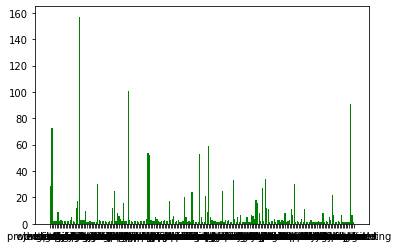

In [ ]:
aliceCountsRDD = aliceRDDX.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y)

lengthCountsAlice = dict(aliceCountsRDD.take(200))

## words length distribution

for length, count in lengthCountsAlice.items():
    print("Length {}: {} words".format(length, count))

## creating a histogram for the word length distribution

import matplotlib.pyplot as plt
import numpy as np

plt.bar(lengthCountsAlice.keys(), lengthCountsAlice.values(), color='g')
plt.show()